# House Price Prediction: Using Linear Regression

## Preprocessing

In [14]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as pyplot
import seaborn as sns
%%matplotlib inline

UsageError: Line magic function `%%matplotlib` not found.


In [10]:
df = pd.read_csv('housing.csv')

In [11]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<Axes: xlabel='median_house_value', ylabel='Count'>

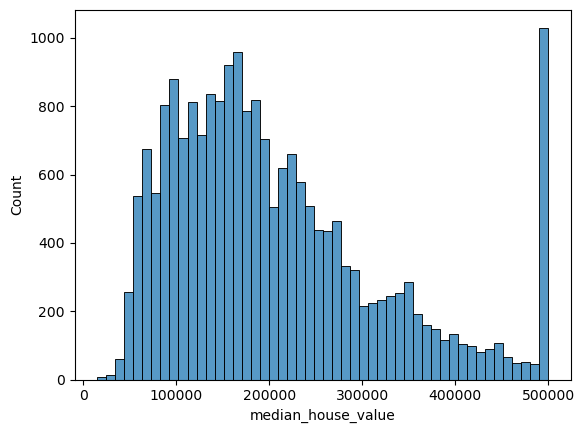

In [19]:
sns.histplot(df.median_house_value, bins=50)

In [20]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [21]:
df1 = df.copy()

In [26]:
df1 = df1[df1['ocean_proximity'].isin(['<1H OCEAN', 'INLAND'])]

In [27]:
df1.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [28]:
df2 = df1.copy()

In [31]:
df2 = df2[['latitude','longitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value']]

In [32]:
#Q1
df2.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [33]:
#Q2
df2.population.median()

1195.0

Splitting the Dataset

In [35]:
n = len(df2)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

n_val, n_test, n_train

(3137, 3137, 9413)

In [113]:
idx = np.arange(n)

In [114]:
np.random.seed(42)
np.random.shuffle(idx)

In [39]:
df_train = df2.iloc[idx[:n_train]]
df_val = df2.iloc[idx[n_train:n_train+n_val]]
df_test = df2.iloc[idx[n_train+n_val:]]

In [40]:
df_train.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
19963,36.23,-119.14,22.0,2935.0,523.0,1927.0,530.0,2.5875,70400.0
5929,34.12,-117.79,16.0,2426.0,426.0,1319.0,446.0,4.8125,224500.0
11377,33.68,-117.97,26.0,3653.0,568.0,1930.0,585.0,5.7301,260900.0
6443,34.10,-118.03,32.0,2668.0,609.0,1512.0,541.0,2.9422,233100.0
17546,37.34,-121.87,39.0,2479.0,541.0,1990.0,506.0,2.4306,289100.0


In [41]:
len(df_train), len(df_val), len(df_test)

(9413, 3137, 3137)

In [42]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [44]:
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

In [45]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [46]:
len(y_train)

9413

## Model Creation

In [65]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

def prepare_X_zero(df):
    df_num = df
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

def prepare_X_mean(df):
    df_num = df
    df_num = df_num.fillna(round(df['total_bedrooms'].mean(),2))
    X = df_num.values
    return X

def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]


### Running Model with Zero for NaN

In [63]:
X_train = prepare_X_zero(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X_zero(df_val)
y_pred = w0 + X_val.dot(w)
round(rmse(y_val, y_pred),2)

0.34

In [64]:
X_train = prepare_X_mean(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X_mean(df_val)
y_pred = w0 + X_val.dot(w)
round(rmse(y_val, y_pred),2)

0.34

In [53]:
#Q3
# To two decimal places, both model had thesame accuracy

array([523., 426., 568., ..., 147., 890., 441.])

### Parameter Turning Of The Model

In [68]:
#Q4
reg = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]
for r in  reg:  
    X_train = prepare_X_zero(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r = r)

    X_val = prepare_X_zero(df_val)
    y_pred = w0 + X_val.dot(w)
    print(r, round(rmse(y_val, y_pred),2))

0 0.34
1e-06 0.34
0.0001 0.34
0.001 0.34
0.01 0.34
0.1 0.34
1 0.34
5 0.35
10 0.35


## Test The Impact of Random Seed Selected On The Model

In [121]:
rmse_values = []
seed_values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
for seed in seed_values:
    idx = np.arange(n)
    np.random.seed(seed)
    np.random.shuffle(idx)

    df_train = df2.iloc[idx[:n_train]]
    df_val = df2.iloc[idx[n_train:n_train+n_val]]
    df_test = df2.iloc[idx[n_train+n_val:]]

    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    y_train = np.log1p(df_train.median_house_value.values)
    y_val = np.log1p(df_val.median_house_value.values)
    y_test = np.log1p(df_test.median_house_value.values)

    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']


    X_train = prepare_X_zero(df_train)
    w0, w = train_linear_regression(X_train, y_train)

    X_val = prepare_X_zero(df_val)
    y_pred = w0 + X_val.dot(w)
    rmse_values.append(round(rmse(y_val, y_pred),2))

In [122]:
round(np.std(rmse_values),3)

0.006

In [112]:
rmse_values

[0.34, 0.34, 0.34, 0.33, 0.34, 0.34, 0.34, 0.35, 0.35, 0.33]

## Build The Final Model
> Using seed of nine, regularization of one to the power of negative three (1^-3), and fill na with zero

In [128]:
# Define random seed for splitting the data
dx = np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)

# Split the data into train, val and test dataset
df_train = df2.iloc[idx[:n_train]]
df_val = df2.iloc[idx[n_train:n_train+n_val]]
df_test = df2.iloc[idx[n_train+n_val:]]

# Reindex the dataset
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

# Convert the target variables to log
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

# Remove the target variables from the features
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']


X_train = prepare_X_zero(pd.concat([df_train, df_val]).reset_index(drop=True))
y_train = np.concatenate([y_train, y_val])

w0, w = train_linear_regression_reg(X_train, y_train, r=0.001)

X_test = prepare_X_zero(df_test)
y_pred = w0 + X_test.dot(w)
print(round(rmse(y_test, y_pred),2))

0.33
